<a href="https://colab.research.google.com/github/syedshahlal/Generative_DL/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers, utils, datasets


In [2]:
def display(
    images, n=10, size=(20, 3), cmap="gray_r", as_type="float32", save_to=None
):
    """
    Displays n random images from each one of the supplied arrays.
    """
    if images.max() > 1.0:
        images = images / 255.0
    elif images.min() < 0.0:
        images = (images + 1.0) / 2.0

    plt.figure(figsize=size)
    for i in range(n):
        _ = plt.subplot(1, n, i + 1)
        plt.imshow(images[i].astype(as_type), cmap=cmap)
        plt.axis("off")

    if save_to:
        plt.savefig(save_to)
        print(f"\nSaved to {save_to}")

    plt.show()

## **Parameters**



In [3]:
NUM_CLASSES = 10

## **Preparing the Data**

In [4]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [5]:
x_train[0][0][0]

array([59, 62, 63], dtype=uint8)

In [6]:
y_train[0]

array([6], dtype=uint8)

In [7]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

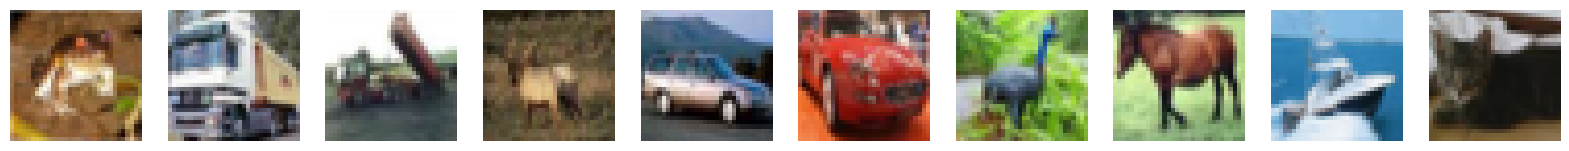

In [8]:
display(x_train)

In [9]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


## **Building the Model**

In [10]:
input_layer = layers.Input((32, 32, 3))

x = layers.Flatten()(input_layer)
x = layers.Dense(300, activation="relu")(x)
x = layers.Dense(250, activation="relu")(x)
x = layers.Dense(200, activation="relu")(x)

output_layer = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = models.Model(input_layer, output_layer)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 300)               921900    
                                                                 
 dense_1 (Dense)             (None, 250)               75250     
                                                                 
 dense_2 (Dense)             (None, 200)               50200     
                                                                 
 dense_3 (Dense)             (None, 10)                2010      
                                                                 
Total params: 1049360 (4.00 MB)
Trainable params: 1049360 (4.

## **Training the Model**

In [11]:
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

In [12]:
model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 8s 3ms/step - loss: 1.8387 - accuracy: 0.3359
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6420 - accuracy: 0.4102
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5590 - accuracy: 0.4432
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5020 - accuracy: 0.4639
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4599 - accuracy: 0.4799
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4223 - accuracy: 0.4916
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3882 - accuracy: 0.5033
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3557 - accuracy: 0.5185
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3236 - accuracy: 0.5264
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.296

## **Evaluating the Model**

In [13]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.3893 - accuracy: 0.5151


[1.3893201351165771, 0.5151000022888184]

In [14]:
CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 [==============================] - 1s 3ms/step


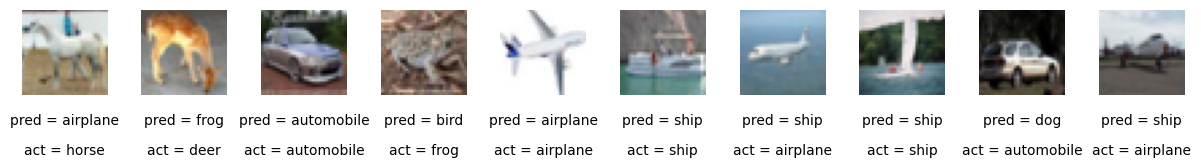

In [15]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)